In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('/home/vinod/Downloads/news_articles.csv')
data.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


# Above dataframe label column convert categorical to numerical

In [3]:
data['label']=data['label'].map({'Real':1,'Fake':0})

In [4]:
data.head(2)

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,1.0,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,1.0,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0


In [5]:
data[data['label']==1].shape

(801, 12)

# Describe the the most used sites_url

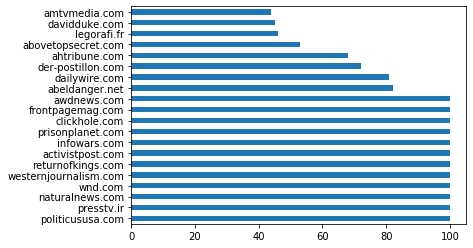

In [6]:
data['site_url'].value_counts().head(20).plot(kind='barh')

## from the above data we get top 20 sites_url get the fake news

# Just find the top author names in the dataframe

Text(0.5, 1.0, 'The  top  20 author list')

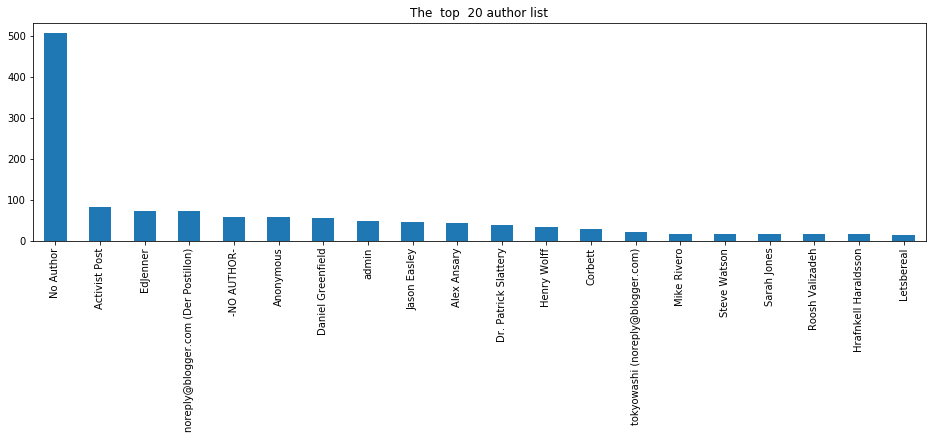

In [7]:
plt.figure(figsize=(16,4))
data['author'].value_counts().head(20).plot(kind='bar')
plt.title('The  top  20 author list')

# Observed
1.In the dataframe No Author is most counts

Text(0.5, 1.0, 'The count of the hasimage')

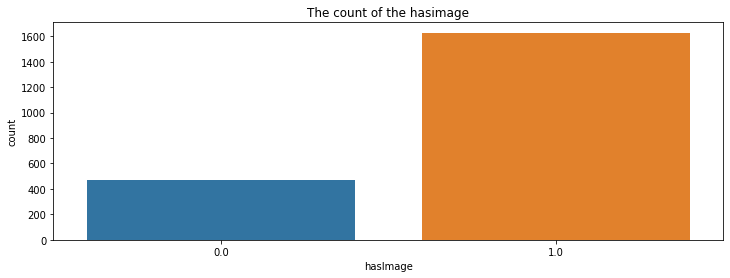

In [8]:
plt.figure(figsize=(12,4))
sns.countplot(data['hasImage'])
plt.title('The count of the hasimage')

Text(0.5, 1.0, 'The type of the news')

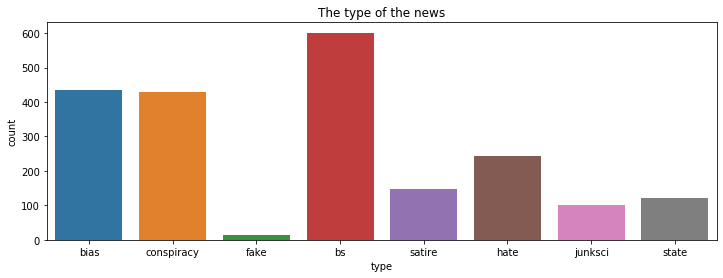

In [9]:
plt.figure(figsize=(12,4))
sns.countplot(data['type'])
plt.title('The type of the news')

# Check the which language is used to fake news

Text(0.5, 1.0, 'The languge used in news')

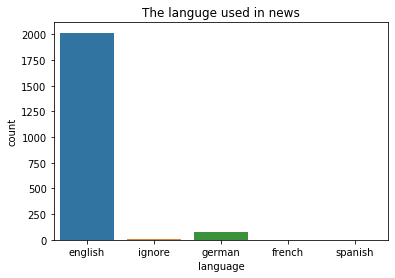

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(data['language'])
plt.title('The languge used in news')

# Observation
1.In the above data English language is most used and some of german language is used

Text(0.5, 1.0, 'The  top  20 author list')

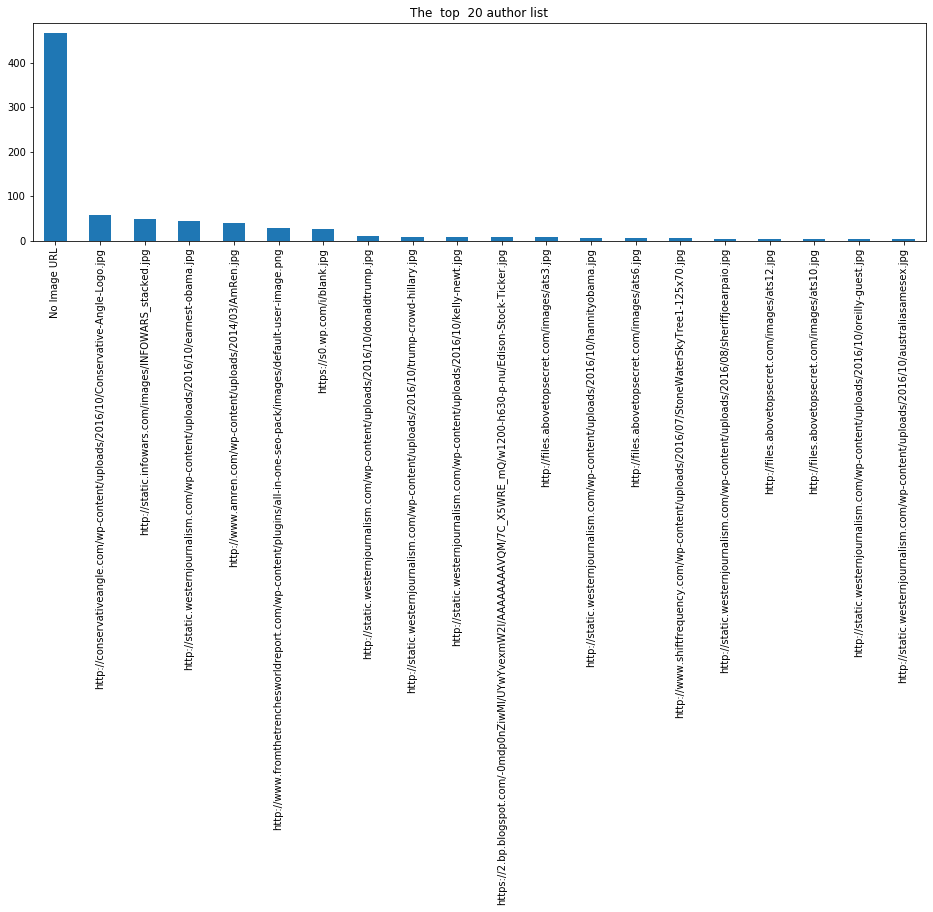

In [11]:
plt.figure(figsize=(16,4))
data['main_img_url'].value_counts().head(20).plot(kind='bar')
plt.title('The  top  20 author list')

In [12]:
data.isna().sum()

author                      0
published                   0
title                       0
text                       46
language                    1
site_url                    1
main_img_url                1
type                        1
label                       1
title_without_stopwords     2
text_without_stopwords     50
hasImage                    1
dtype: int64

In [13]:
data.dropna(inplace=True)

In [14]:
data.columns

Index(['author', 'published', 'title', 'text', 'language', 'site_url',
       'main_img_url', 'type', 'label', 'title_without_stopwords',
       'text_without_stopwords', 'hasImage'],
      dtype='object')

In [15]:
data.drop(['published','hasImage','language'],axis=1,inplace=True)

# Use countvectorize algoritham to convert message into array form so in the below

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
cv=CountVectorizer(binary=True,stop_words='english',lowercase=True)

cv.fit_transform(data['text'])

<2045x46905 sparse matrix of type '<class 'numpy.int64'>'
	with 358682 stored elements in Compressed Sparse Row format>

In [18]:
X=data['text_without_stopwords']
y=data['label']

In [19]:
print(X.shape)
print(y.shape)

(2045,)
(2045,)


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=140)

In [22]:
print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

(1023,)
(1022,)
(1023,)
(1022,)


In [23]:
X_train.head(5)

61      plenty proof machines rigged whic also means t...
724     bryan texas police officer investigating distu...
2035    pope god promised land people israel statement...
880     tim brown among many wikileaks emails dumped s...
1547    news bulletin common swift new study revealed ...
Name: text_without_stopwords, dtype: object

# Transferd the categorical data to array using the parameters vocabulary and feature names

In [24]:
X_train=cv.fit_transform(X_train).toarray()
X_test=cv.transform(X_test).toarray()

In [25]:
cv.vocabulary_

{'plenty': 21776,
 'proof': 22703,
 'machines': 17267,
 'rigged': 24607,
 'whic': 31832,
 'means': 17891,
 'trhe': 29682,
 'polls': 21938,
 'match': 17747,
 'know': 15968,
 'ask': 1803,
 'poll': 21929,
 'thousand': 29122,
 'asked': 1805,
 'questions': 23166,
 'option': 20381,
 'possible': 22049,
 'tell': 28799,
 'hundreds': 13861,
 'millions': 18334,
 'people': 21224,
 'havent': 12993,
 'polled': 21931,
 'think': 29069,
 'impossible': 14266,
 'greatest': 12389,
 'elite': 9039,
 'using': 30715,
 'past': 21033,
 'eletion': 9017,
 'results': 24393,
 'ppredict': 22156,
 'future': 11532,
 'scam': 25360,
 'soros': 27019,
 'expects': 9993,
 'quotlandslide': 23207,
 'popular': 21980,
 'vote': 31321,
 'victoryquot': 31121,
 'trump': 29807,
 'president': 22353,
 'clinton': 5142,
 'quotdone': 23201,
 'dealquot': 6998,
 'zero': 32588,
 'hedge': 13119,
 'deal': 6989,
 'alright': 970,
 'rinning': 24648,
 'gig': 11998,
 'forever': 11117,
 'bryan': 3816,
 'texas': 28933,
 'police': 21870,
 'officer': 

In [26]:
len(cv.vocabulary_)

32746

In [27]:
feature_names=cv.get_feature_names()

In [28]:
feature_names

['___',
 'aa',
 'aab',
 'aafe',
 'aah',
 'aaja',
 'aand',
 'aap',
 'aaps',
 'aaron',
 'aas',
 'ab',
 'aba',
 'abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abated',
 'abbas',
 'abbasside',
 'abbey',
 'abbott',
 'abbotts',
 'abbreche',
 'abbrechen',
 'abbreviated',
 'abbricht',
 'abc',
 'abccbsfoxyounameit',
 'abcdisney',
 'abcnbccbsapbsnprcnnwashingtonpostpolitico',
 'abcpolitics',
 'abcs',
 'abd',
 'abdallah',
 'abdel',
 'abdelghafour',
 'abdelmoumen',
 'abdelrahman',
 'abdicate',
 'abdirahman',
 'abdomen',
 'abdominal',
 'abdrabbuh',
 'abducted',
 'abducting',
 'abduction',
 'abdul',
 'abdulazeez',
 'abdulaziz',
 'abdullah',
 'abdulmalik',
 'abdus',
 'abe',
 'abedin',
 'abedins',
 'abel',
 'abeldangernet',
 'abend',
 'abenteuerlustige',
 'aber',
 'abernethy',
 'abets',
 'abetting',
 'abgebrochen',
 'abgedecktes',
 'abgefunden',
 'abgeführt',
 'abgelegenen',
 'abgelehnt',
 'abgeschotteten',
 'abgesichert',
 'abgestimmt',
 'abgesucht',
 'abgewickelt',
 'abgewägt',
 'abholen'

In [29]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [30]:
print(len(feature_names))
print('the shape of x_train is',X_train.shape)

32746
the shape of x_train is (1022, 32746)


# Convert the X_train data and features name to create the data frame

In [31]:
data=pd.DataFrame(X_test,columns=feature_names)

In [32]:
data.head()

,___,aa,aab,aafe,aah,aaja,aand,aap,aaps,aaron,...,überraschend,überraschende,überrascht,überreicht,überteuerten,überwacht,überwachungskameras,überzeugt,übrig,übte
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
print(X_test.shape)

(1023, 32746)


# Using the navie_bayes algoritham to predict the values

In [34]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB

In [35]:
mult=MultinomialNB(alpha=1.5, fit_prior=True)
mult.fit(X_train,y_train)

MultinomialNB(alpha=1.5)

In [36]:
mult.score(X_train,y_train)

0.9716242661448141

In [37]:
mult.score(X_test,y_test)

0.7223851417399805

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
mult_pred=mult.predict(X_test)

In [40]:
print("The accuracy score in multinomial is",format(accuracy_score(y_test,mult_pred)))

The accuracy score in multinomial is 0.7223851417399805


In [41]:
ber=BernoulliNB()
ber.fit(X_train,y_train)

BernoulliNB()

In [42]:
ber_pred=ber.predict(X_test)

In [43]:
print("the test_score",ber.score(X_test,y_test))
print("the train_score",ber.score(X_train,y_train))

the test_score 0.6500488758553274
the train_score 0.8072407045009785


In [44]:
print("The accuracy score in bernoulli is",format(accuracy_score(y_test,ber_pred)))

The accuracy score in bernoulli is 0.6500488758553274


In [45]:
gus=GaussianNB()
gus.fit(X_train,y_train)

GaussianNB()

In [46]:
gus_pred=gus.predict(X_test)

In [47]:
print("the test_score",gus.score(X_test,y_test))
print("the train_score",gus.score(X_train,y_train))

the test_score 0.6744868035190615
the train_score 0.9794520547945206


In [48]:
print("The accuracy score in gussian is",format(accuracy_score(y_test,gus_pred)))

The accuracy score in gussian is 0.6744868035190615


In [49]:
print("the test_score",gus.score(X_test,y_test))
print("the train_score",gus.score(X_train,y_train))
print("the test_score",ber.score(X_test,y_test))
print("the train_score",ber.score(X_train,y_train))
print("the test_score",mult.score(X_test,y_test))
print("the train_score",mult.score(X_train,y_train))

the test_score 0.6744868035190615
the train_score 0.9794520547945206
the test_score 0.6500488758553274
the train_score 0.8072407045009785
the test_score 0.7223851417399805
the train_score 0.9716242661448141


# From the above observation multinomial algoritham is good

In [50]:
print("The accuracy score in gussian is",format(accuracy_score(y_test,gus_pred)))
print("The accuracy score in bernoulli is",format(accuracy_score(y_test,ber_pred)))
print("The accuracy score in multinomial is",format(accuracy_score(y_test,mult_pred)))

The accuracy score in gussian is 0.6744868035190615
The accuracy score in bernoulli is 0.6500488758553274
The accuracy score in multinomial is 0.7223851417399805


# And also used Logisticregresion algorithm

In [61]:
from sklearn.linear_model import LogisticRegression

In [79]:
model=LogisticRegression(penalty='l2',solver='sag',fit_intercept=True,random_state=42)
model.fit(X_train,y_train)

LogisticRegression(random_state=42, solver='sag')

In [80]:
model.score(X_test,y_test)

0.71484375

In [81]:
pred=model.predict(X_test)

In [82]:
pred

array([1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [84]:
data['pred']=data['pred']

KeyError: 'pred'